# Importing initial Library


In [19]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm


# Data loading and intial cleaning

In [20]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_R50.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(1487, 60) (1487,)


# Splitting The data

In [21]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1189, 60) (1189,)
Test set:  (298, 60) (298,)


# Ensuring imputation

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Importing All model Building Library

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [25]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)
gnb.fit(X_train, y_train)
KNN.fit(X_train, y_train)
BC.fit(X_train, y_train)
EC.fit(X_train, y_train)
ADC.fit(X_train, y_train)
GBC.fit(X_train, y_train)
LR.fit(X_train, y_train)
BCR.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

# Predicting the Value

In [26]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)
mnb_pred = mnb.predict(X_test)

# Getting Accuracy and AUC

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)
mnb_acc = accuracy_score(y_test, mnb_pred)

In [28]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)
mnb_auc = roc_auc_score(y_test, mnb_pred)

In [29]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)
print('multinomial: %.6f' % mnb_acc)
print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)
print('multinomial: %.6f' % mnb_auc)

Decision tree acc: 0.644295
Random forest acc: 0.661074
SVM acc: 0.664430
Nabive Baise acc: 0.590604
KNN: 0.627517
BAGGING: 0.667785
Extra tree: 0.681208
ADC Boosting: 0.661074
GDC Boosting: 0.684564
Logistic: 0.708054
BAGGING Random Forest: 0.691275
multinomial: 0.644295

Decision tree AUC: 0.615452
Random forest AUC: 0.639090
SVM AUC: 0.647757
gnb AUC: 0.603077
KNN AUC: 0.611513
Bagging AUC: 0.637885
Extra tree AUC: 0.660966
ADC Boosting: 0.647201
GDC Boosting: 0.668474
Logistic: 0.689748
BAGGING Random Forest: 0.666110
multinomial: 0.618928


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


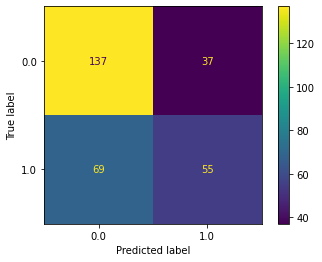

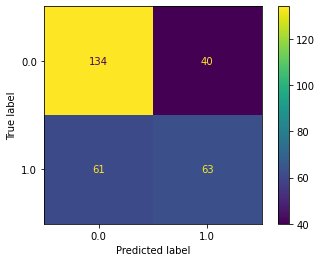

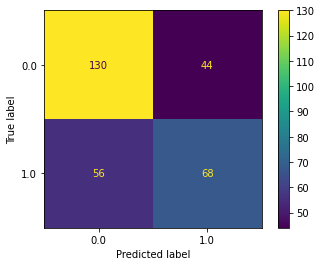

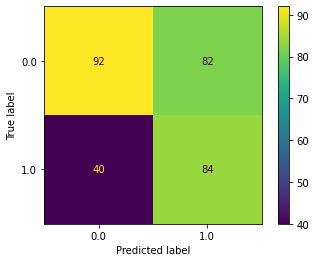

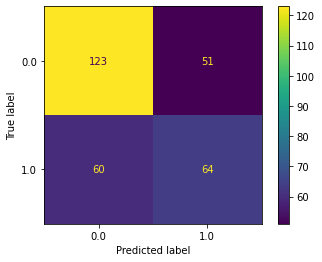

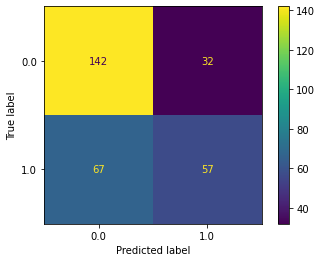

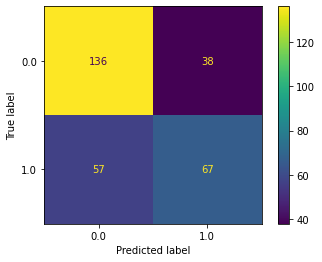

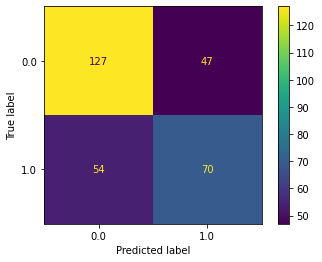

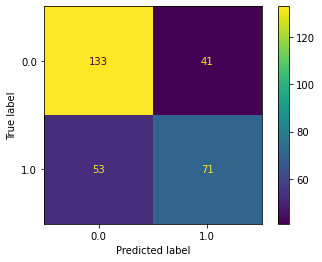

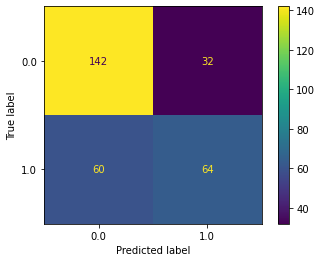

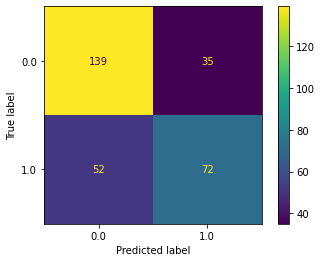

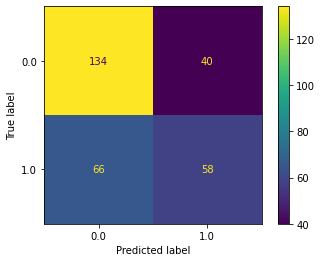

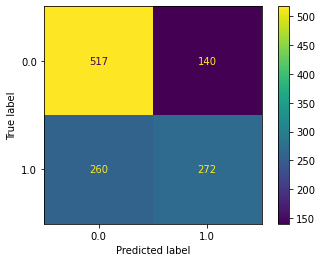

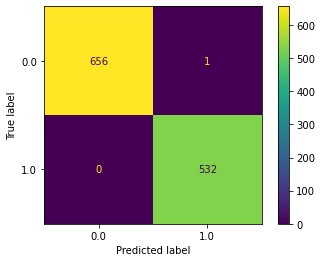

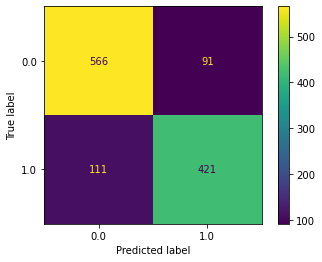

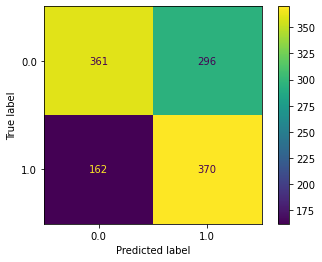

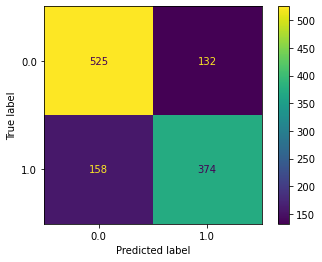

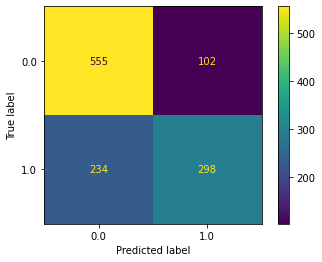

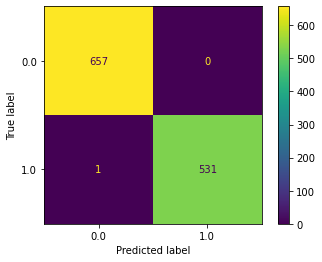

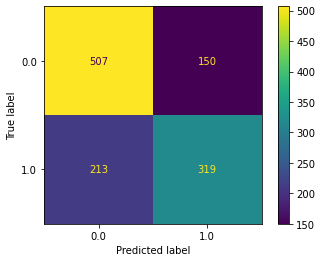

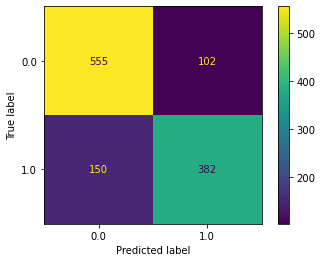

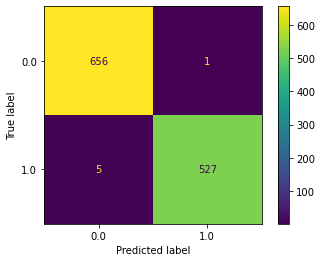

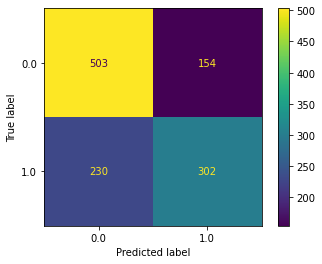

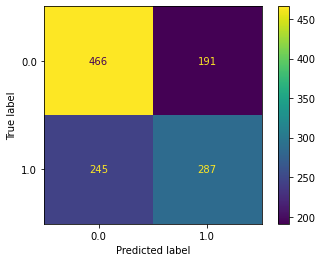

In [30]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)
p12=plot_confusion_matrix(mnb, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)
p24=plot_confusion_matrix(mnb, X_train, y_train)

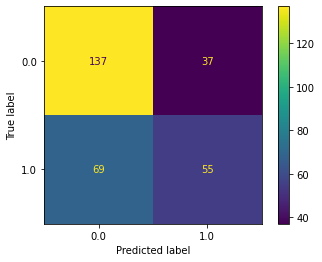

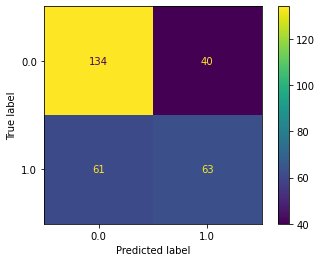

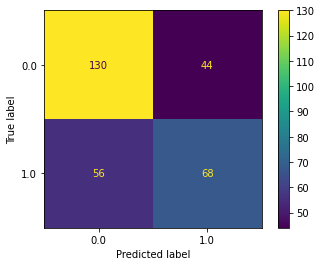

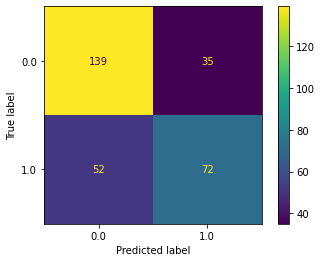

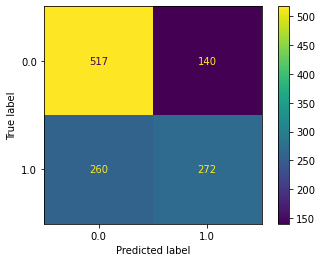

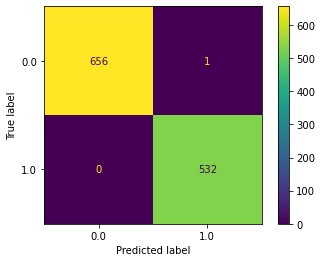

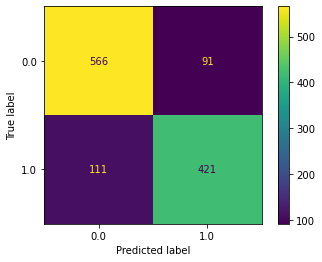

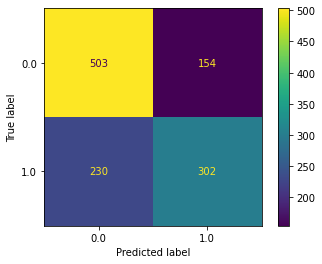

In [31]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

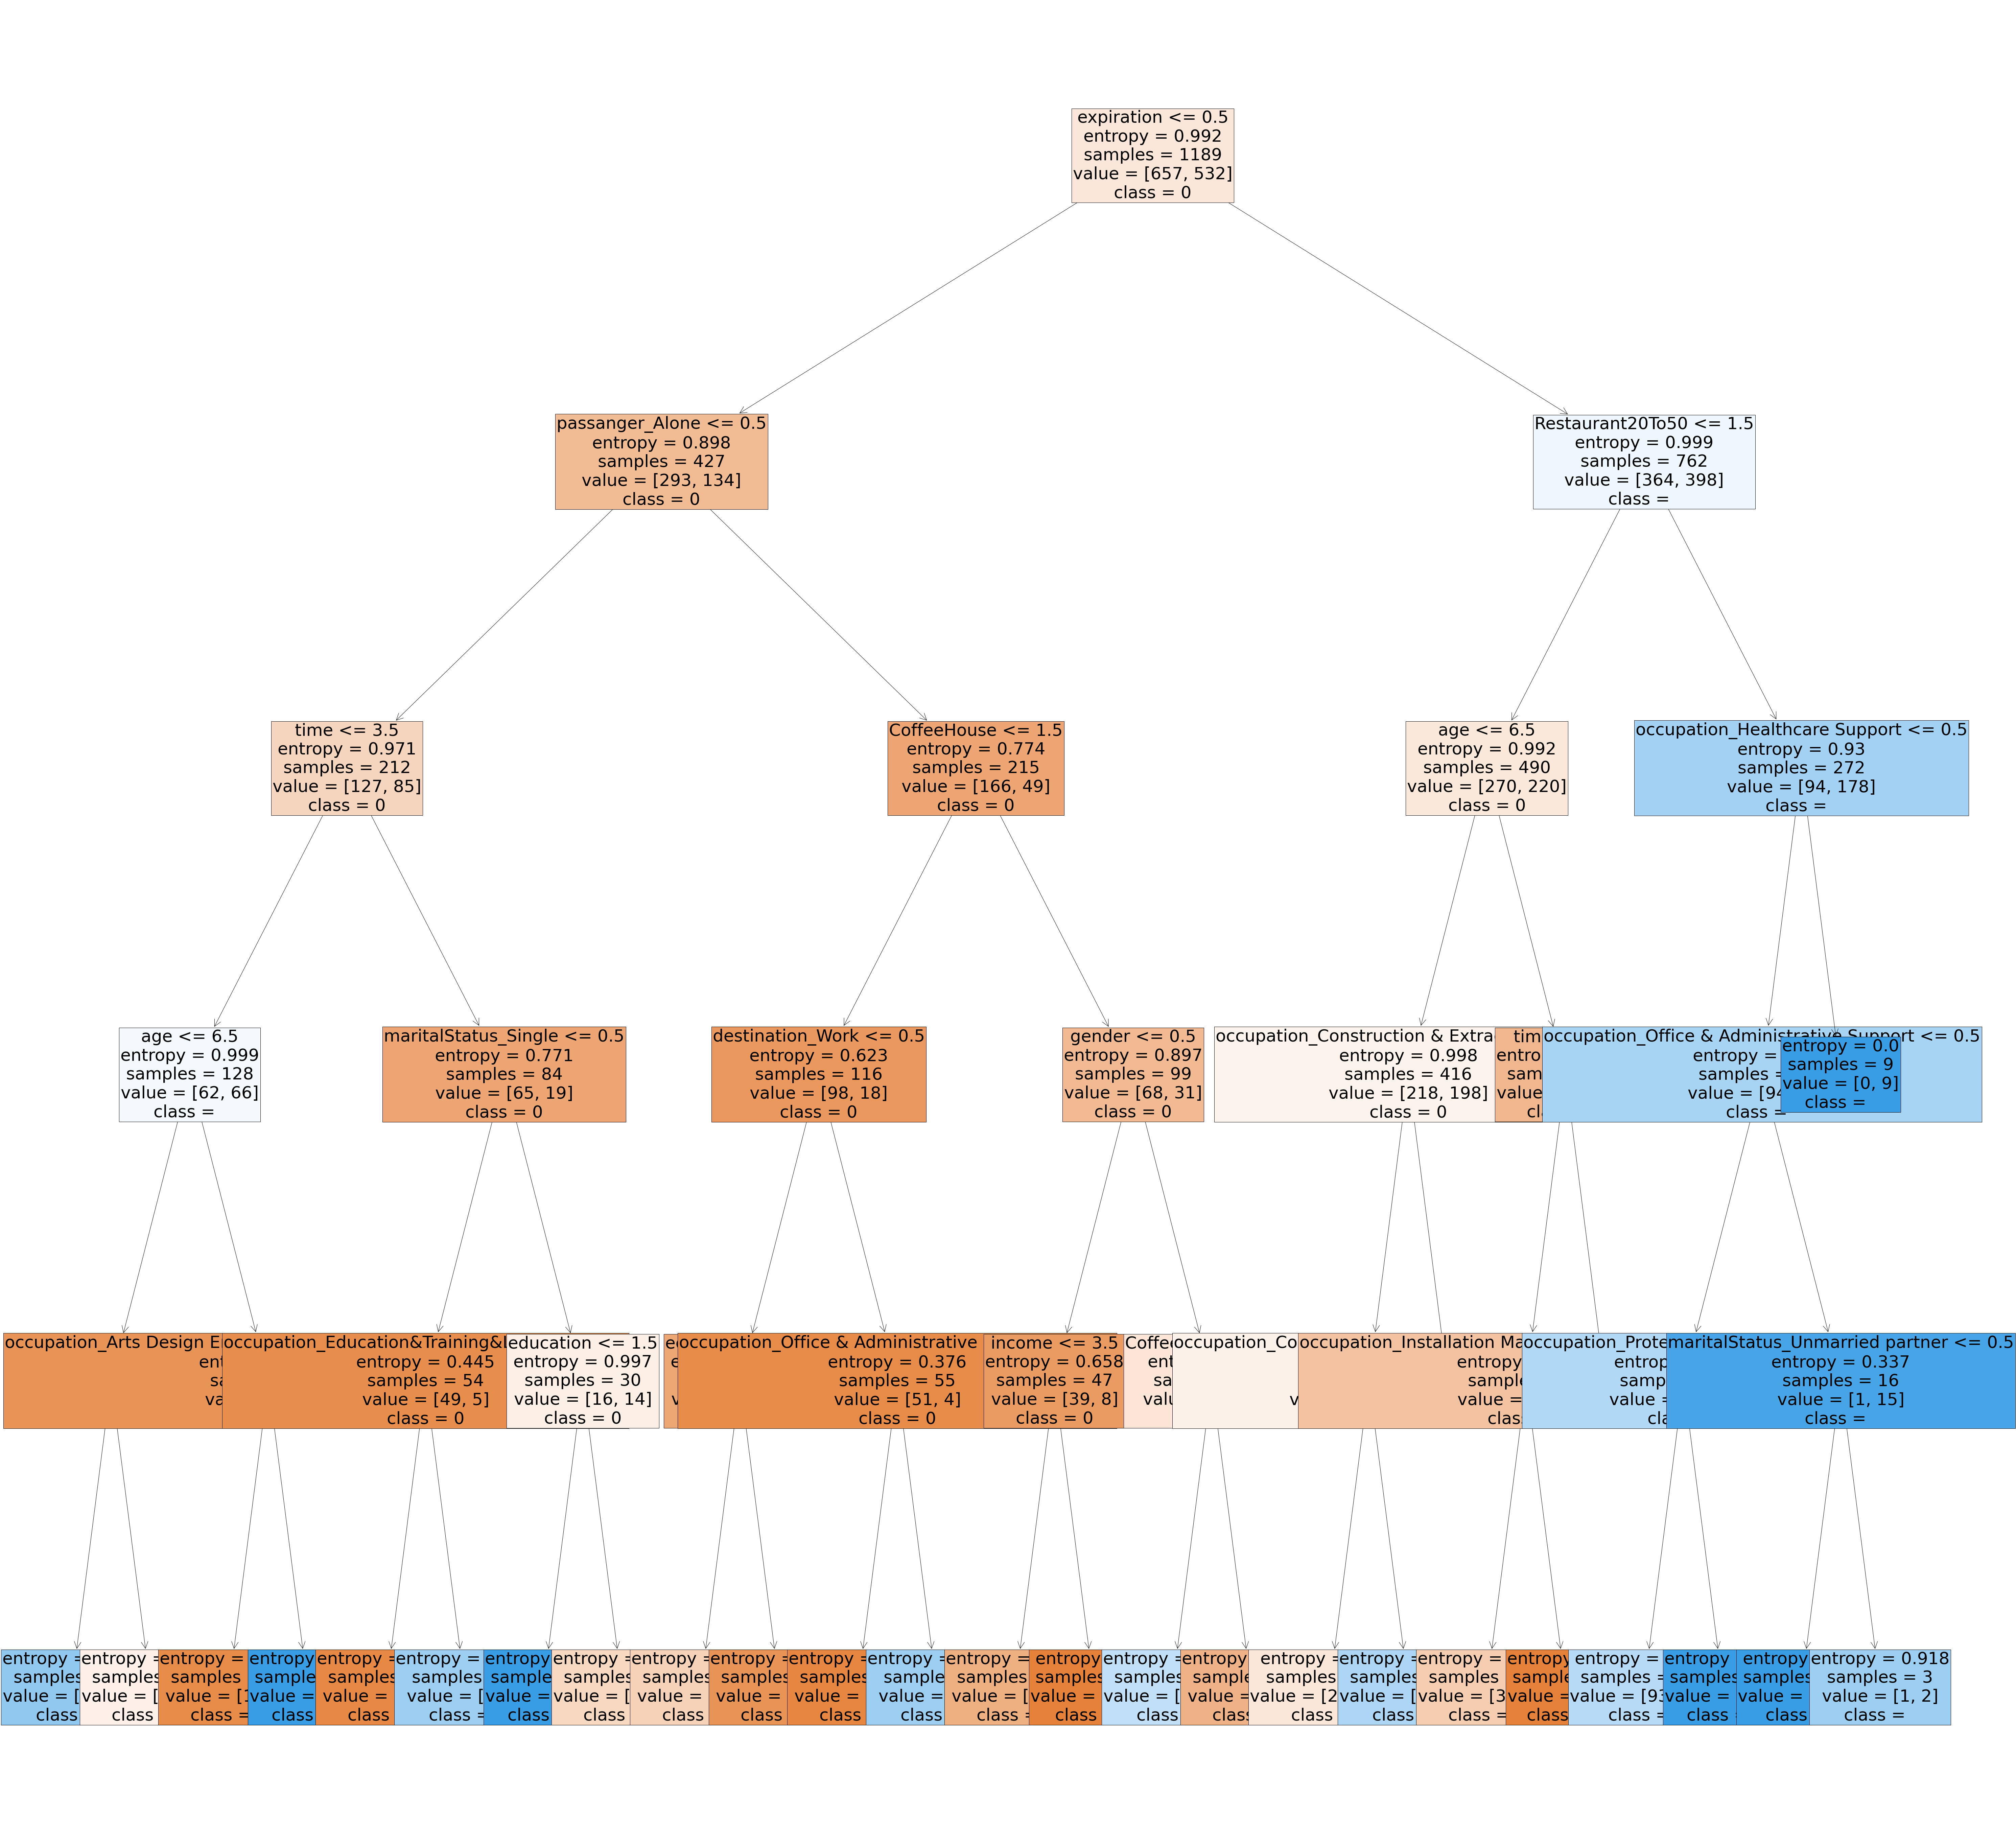

In [32]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_R50.png')


# Validating the Training set Accuracy

In [33]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)
mnb_pred1 = mnb.predict(X_train)

dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)
mnb_acc1 = accuracy_score(y_train, mnb_pred1)

dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)
mnb_auc1 = roc_auc_score(y_train, mnb_pred1)

print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)
print('multinomial: %.6f' % mnb_acc1)
print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)
print('multinomial: %.6f' % mnb_auc1)

Decision tree acc: 0.663583
Random forest acc: 0.999159
SVM acc: 0.830109
Nabive Baise acc: 0.614802
KNN: 0.756098
BAGGING: 0.717410
Extra tree: 0.999159
ADC Boosting: 0.694701
GDC Boosting: 0.788057
Logistic: 0.677040
BAGGING Random Forest: 0.994954
multinomial: 0.633305

Decision tree AUC: 0.649094
Random forest AUC: 0.999239
SVM AUC: 0.826423
gnb AUC: 0.622478
KNN AUC: 0.751047
Bagging AUC: 0.702450
Extra tree AUC: 0.999060
ADC Boosting: 0.685657
GDC Boosting: 0.781397
Logistic: 0.666635
BAGGING Random Forest: 0.994540
multinomial: 0.624379


In [34]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)
print(mnb)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x2CA67368140)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x2CA67368140)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x2CA67368140),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x2CA67368140),
         

# Voting

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))



In [37]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6274396880101578


# Explorative data analysis

In [38]:
from matplotlib import pyplot

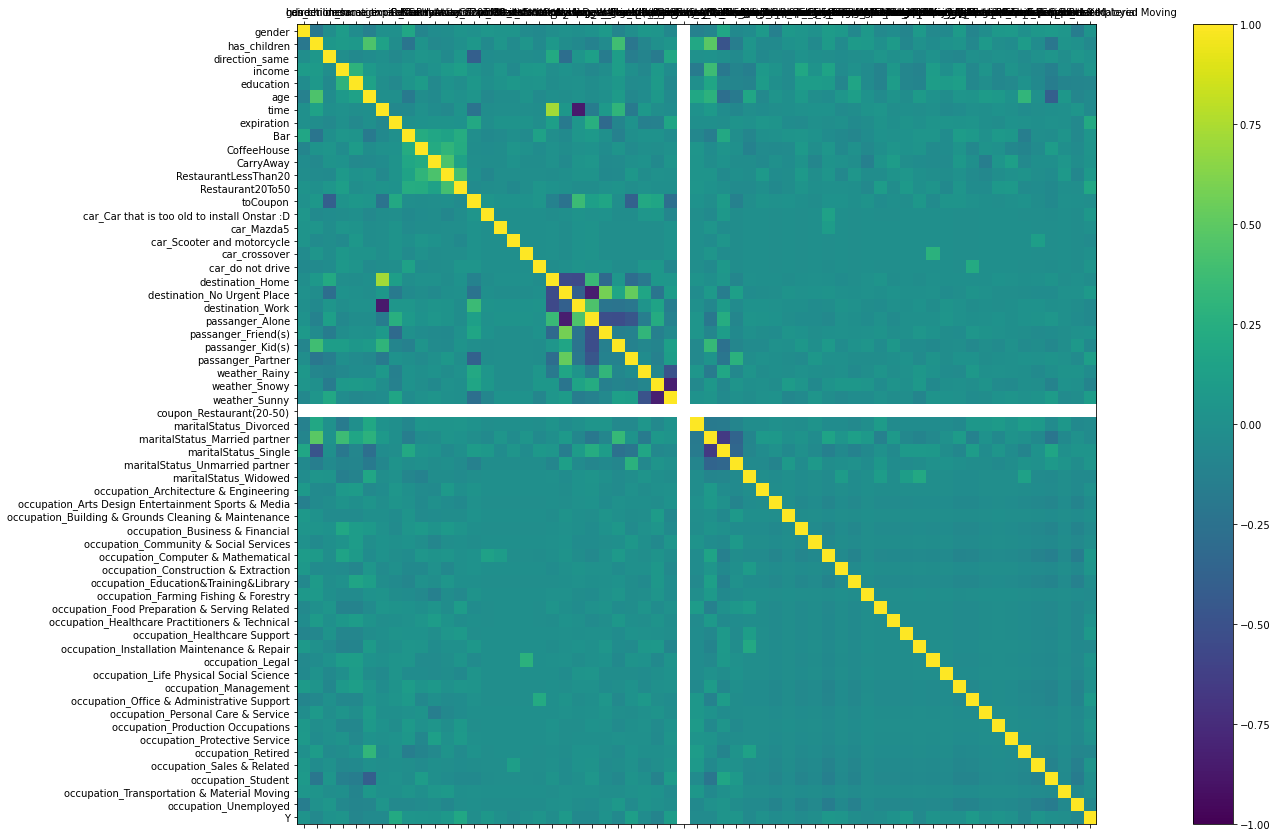

In [39]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure(figsize =(200,50))
ax = fig.add_subplot(353)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df1.head()
ticks = np.arange(0,61,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
x2=pyplot.show()

In [40]:
from pandas.plotting import scatter_matrix

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


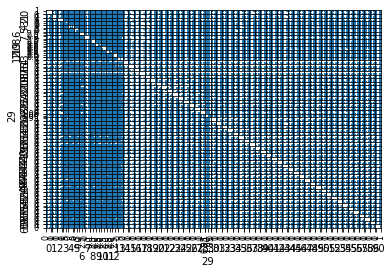

In [41]:
scatter_matrix(df)

pyplot.show()

In [42]:
peek = df.head(20)
print(peek)

     0    1    2    3    4   ...   56   57   58   59   60
0   0.0  1.0  0.0  3.0  2.0  ...  0.0  0.0  0.0  1.0  1.0
1   0.0  1.0  0.0  3.0  2.0  ...  0.0  0.0  0.0  1.0  1.0
2   1.0  0.0  0.0  5.0  4.0  ...  0.0  0.0  0.0  0.0  0.0
3   1.0  0.0  0.0  5.0  4.0  ...  0.0  0.0  0.0  0.0  0.0
4   1.0  0.0  0.0  1.0  2.0  ...  0.0  1.0  0.0  0.0  0.0
5   1.0  0.0  0.0  1.0  2.0  ...  0.0  1.0  0.0  0.0  0.0
6   1.0  1.0  0.0  6.0  4.0  ...  0.0  0.0  0.0  0.0  0.0
7   1.0  1.0  0.0  6.0  4.0  ...  0.0  0.0  0.0  0.0  1.0
8   1.0  0.0  0.0  1.0  3.0  ...  0.0  1.0  0.0  0.0  1.0
9   1.0  0.0  0.0  1.0  3.0  ...  0.0  1.0  0.0  0.0  1.0
10  1.0  0.0  0.0  4.0  4.0  ...  0.0  1.0  0.0  0.0  0.0
11  1.0  0.0  0.0  4.0  4.0  ...  0.0  1.0  0.0  0.0  0.0
12  0.0  1.0  0.0  5.0  2.0  ...  0.0  0.0  0.0  1.0  0.0
13  0.0  1.0  0.0  5.0  2.0  ...  0.0  0.0  0.0  1.0  0.0
14  1.0  0.0  0.0  3.0  2.0  ...  0.0  0.0  0.0  0.0  1.0
15  1.0  0.0  0.0  3.0  2.0  ...  0.0  0.0  0.0  0.0  1.0
16  0.0  1.0  

In [43]:
shape = df.shape
print(shape)

(1487, 61)


In [44]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60    float64
Length: 61, dtype: object


In [45]:
from pandas import set_option

In [46]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

         gender  has_children  direction_same    income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed         Y
count  1487.000      1487.000        1487.000  1487.000   1487.000  ...                    1487.000            1487.000                                     1487.000               1487.000  1487.000
mean      0.495         0.437           0.173     3.784      3.122  ...                       0.081               0.118                                        0.015                  0.157     0.441
std       0.500         0.496           0.378     2.553      1.250  ...                       0.272               0.323                                        0.123                  0.364     0.497
min       0.000         0.000           0.000     0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000     0.000
25%       

In [47]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    831
1    656
dtype: int64


In [48]:
correlations = df.corr(method='pearson')
print(correlations)

       0      1      2      3      4   ...     56     57     58     59     60
0   1.000 -0.197 -0.011  0.095 -0.025  ...  0.062  0.083  0.050 -0.153  0.028
1  -0.197  1.000  0.056  0.088  0.064  ... -0.027 -0.210  0.032  0.012 -0.059
2  -0.011  0.056  1.000 -0.015 -0.052  ...  0.008  0.042 -0.014  0.053  0.020
3   0.095  0.088 -0.015  1.000  0.290  ... -0.069 -0.131 -0.006 -0.070  0.032
4  -0.025  0.064 -0.052  0.290  1.000  ... -0.053 -0.149 -0.095 -0.087 -0.080
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
56  0.062 -0.027  0.008 -0.069 -0.053  ...  1.000 -0.109 -0.037 -0.128  0.035
57  0.083 -0.210  0.042 -0.131 -0.149  ... -0.109  1.000 -0.046 -0.158 -0.003
58  0.050  0.032 -0.014 -0.006 -0.095  ... -0.037 -0.046  1.000 -0.054 -0.013
59 -0.153  0.012  0.053 -0.070 -0.087  ... -0.128 -0.158 -0.054  1.000 -0.070
60  0.028 -0.059  0.020  0.032 -0.080  ...  0.035 -0.003 -0.013 -0.070  1.000

[61 rows x 61 columns]


In [49]:
skew = df.skew()
print(skew)

0     0.020
1     0.254
2     1.732
3     0.315
4    -0.129
      ...  
56    3.082
57    2.365
58    7.861
59    1.891
60    0.237
Length: 61, dtype: float64


In [50]:
skew.to_csv('Skew2_Carryout.csv', index=False)

In [51]:
correlations.to_csv('correlations2_Carryout.csv', index=False)

In [52]:
description.to_csv('description_Carryout.csv', index=False)

# Random Forest Tree

In [53]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

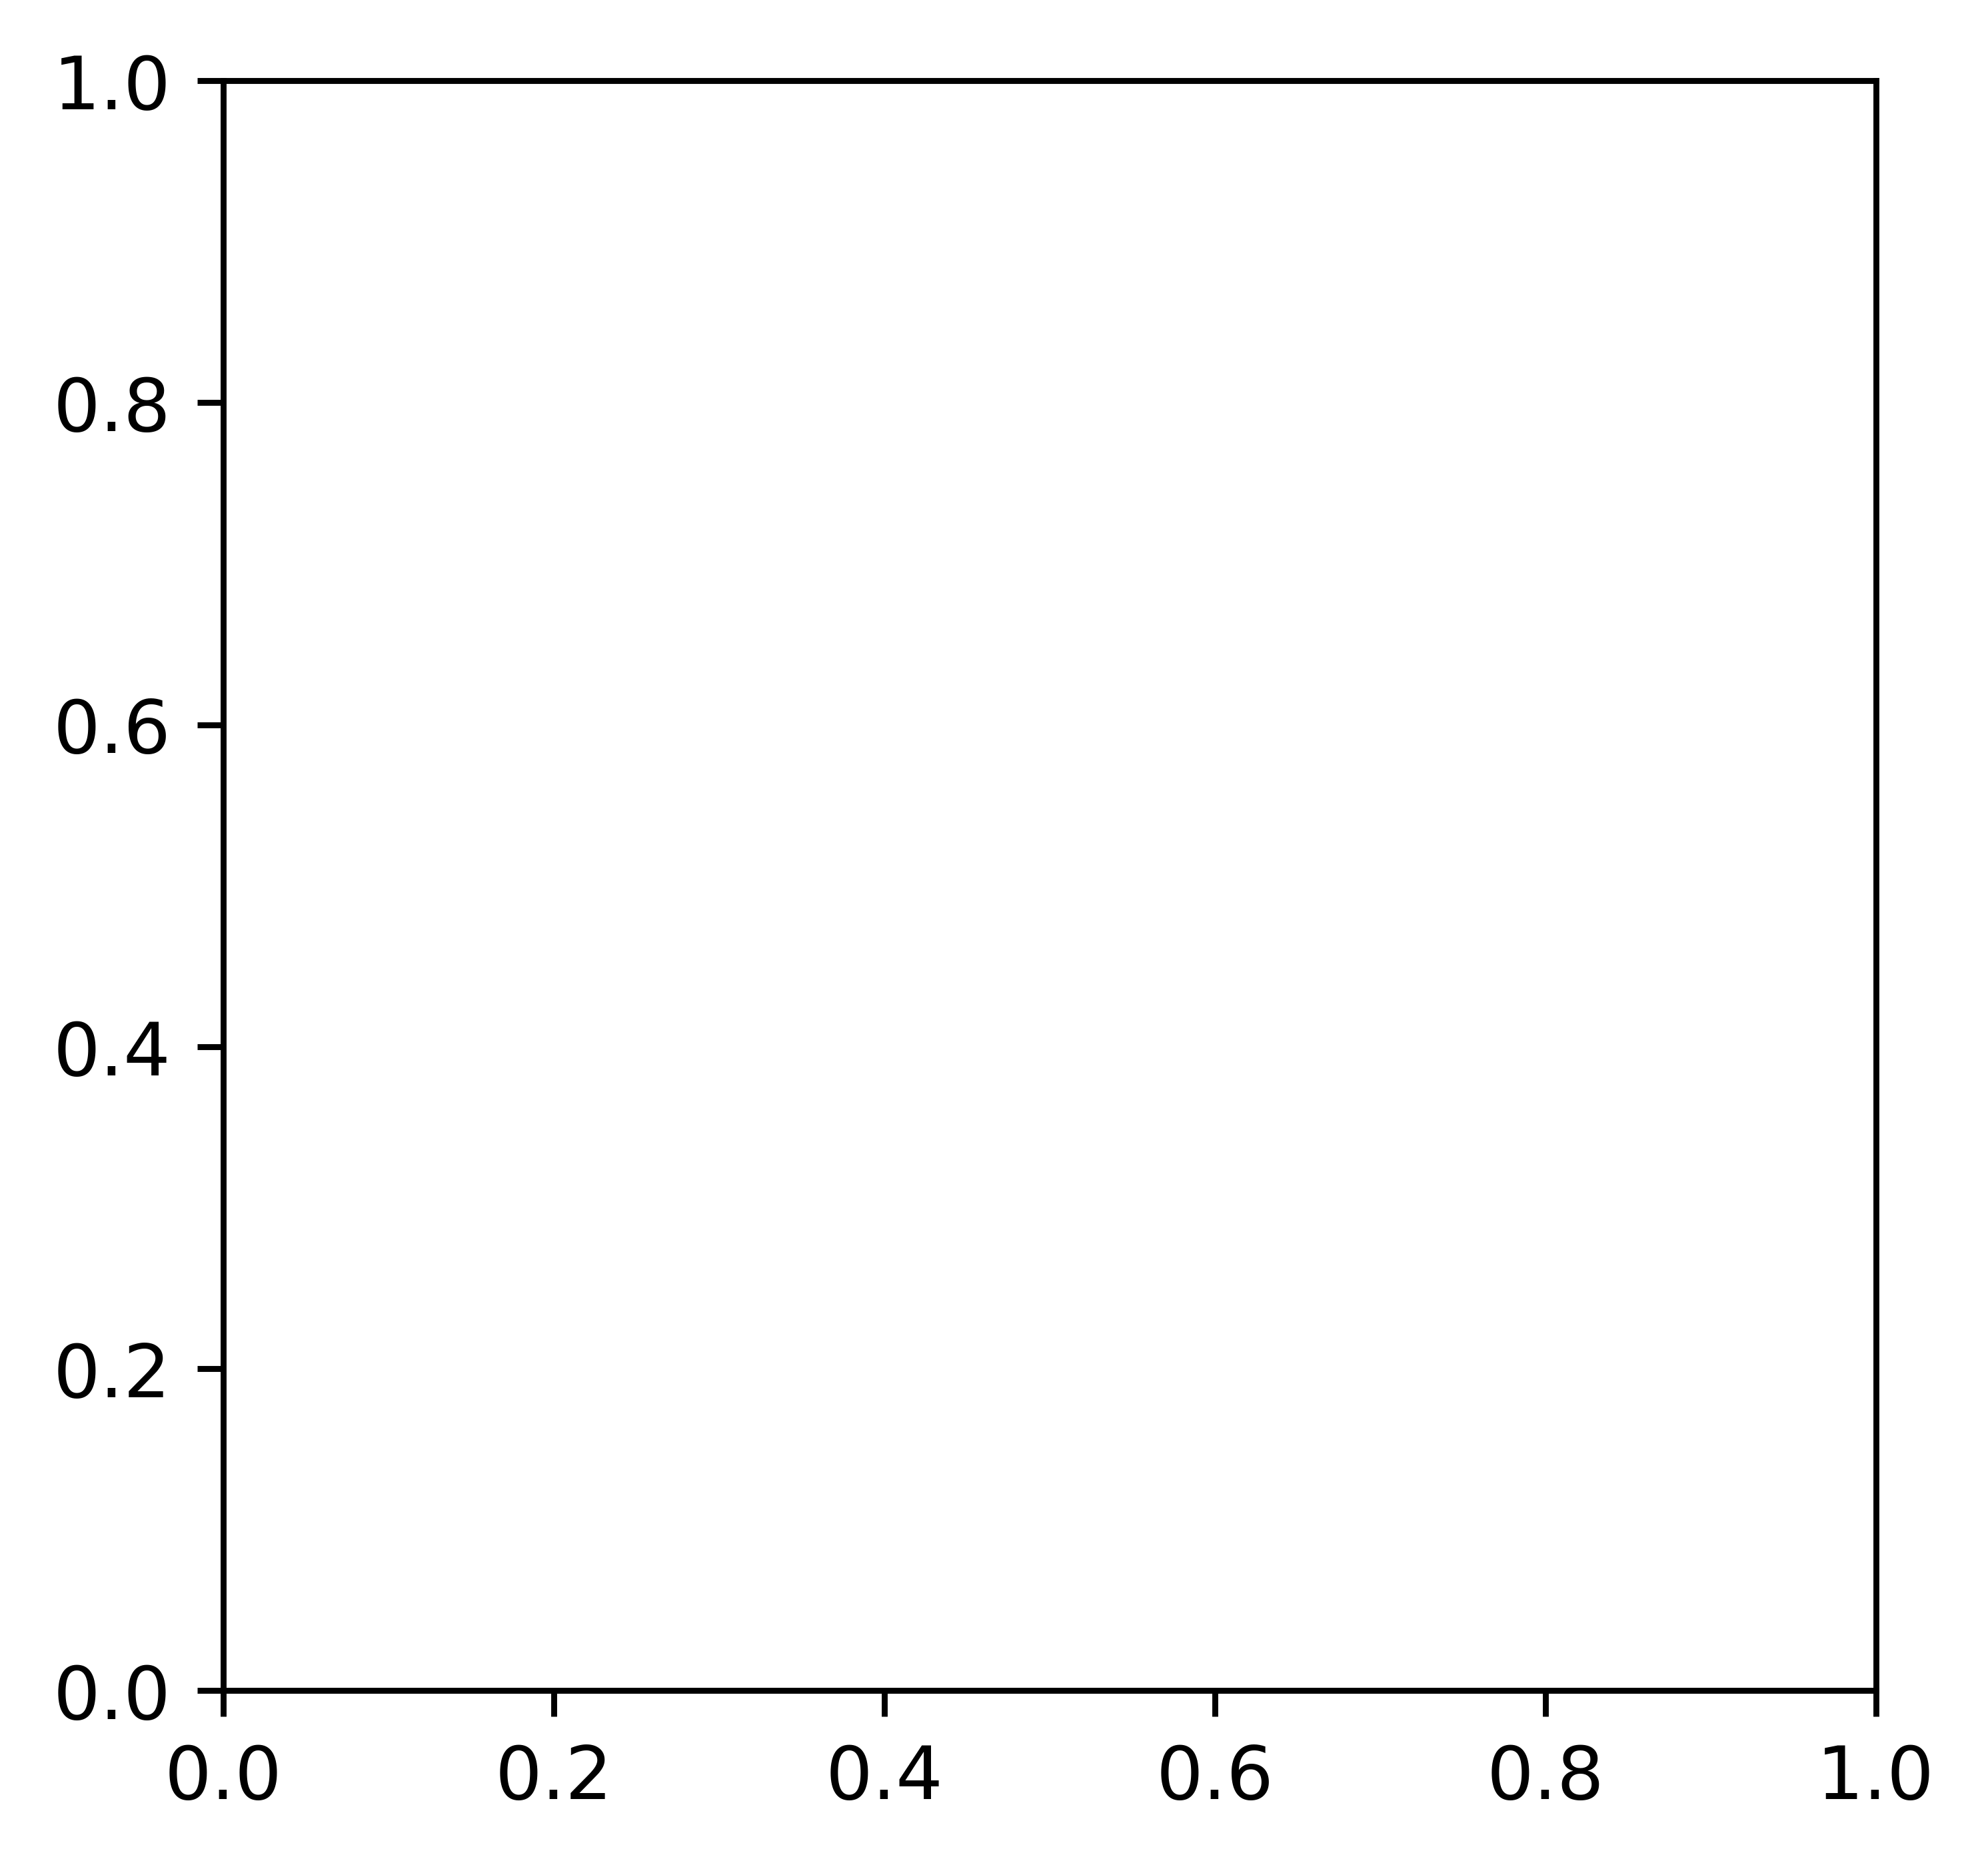

In [54]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_Carryout.png')